## Experiment Design

This notebook aims to compare different pivot rules for randomly generated linear programs that *always have the origin point as the starting solution*.  
To achieve this, I will consider three main categories of problems:

### **1. Balanced Problems (m = n)**  
These are square linear programs where the number of constraints equals the number of variables. I will generate instances in increments of 5, covering the following sizes:

- (5×5), (10×10), (15×15), (20×20), (25×25), (30×30), (35×35), (40×40), (45×45), (50×50)
- (55×55), (60×60), (65×65), (70×70), (75×75), (80×80), (85×85), (90×90), (95×95), (100×100)

### **2. Wide Problems (m < n, n = 2m)**  
These problems have twice as many variables as constraints, representing underdetermined systems. The chosen sizes are:

- (5×10), (10×20), (15×30), (20×40), (25×50), (30×60), (35×70), (40×80), (45×90), (50×100)

### **3. Tall Problems (m > n, m = 2n)**  
These problems have twice as many constraints as variables, representing overdetermined systems. The chosen sizes are:

- (10×5), (20×10), (30×15), (40×20), (50×25), (60×30), (70×35), (80×40), (90×45), (100×50)

## **Number of Instances per Category**  
To ensure sufficient variation across different problem sizes, I will generate 250 problems per subcategory. This is because I also want to make the running time feasible.

This results in a total of **20,000 randomly generated problems** for the experiment.

## **Metrics for Comparison**  
To evaluate the performance of different pivot rules, I will measure:

1. **Number of iterations (pivot steps) taken** to reach optimality
2. **Computation time** for each problem instance

## Imports, setup and problems creation

In [33]:

import random
import os
import sys
from dense_lp_generator import DenseLPGenerator
from simplex_solver import SimplexSolver
from input_parser import LPParser

# IMPORTANT: Set random seed for reproducibility.
random.seed(42)

balanced_sizes = [(i, i) for i in range(5, 101, 5)]
wide_sizes = [(i, 2*i) for i in range(5, 51, 5)]
tall_sizes = [(2*i, i) for i in range(5, 51, 5)]
root_folder = os.path.join('problems', 'problems_pivot_rules_one_phase_only')
balanced_folder = os.path.join(root_folder, 'balanced_problems')
wide_folder = os.path.join(root_folder, 'wide_problems')
tall_folder = os.path.join(root_folder, 'tall_problems')
random_dense_gen = DenseLPGenerator(precision = 4)

if not os.path.exists(root_folder):
    os.mkdir(root_folder)

if not os.path.exists(balanced_folder):
    os.mkdir(balanced_folder)
    
if not os.path.exists(wide_folder):
    os.mkdir(wide_folder)
    
if not os.path.exists(tall_folder):
    os.mkdir(tall_folder)

### Generating the balanced problems

In [2]:
for (x, y) in balanced_sizes:
    current_size_folder = os.path.join(balanced_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

### Generating the wide problems

In [3]:
for (x, y) in wide_sizes:
    current_size_folder = os.path.join(wide_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

### Generating the tall problems

In [4]:
for (x, y) in tall_sizes:
    current_size_folder = os.path.join(tall_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

## The first experiment - Running time for balanced problems
This experiment aims to plot the average time of Dantzig's pivot rule for all problem sizes, in order to establish a feasible upper bound for our problem sizes, i.e. to be able to run the experiment in a timely manner

In [2]:
import json
import time
from tqdm import tqdm
dantzig_solver = SimplexSolver(pivot_rule = 'Dantzig')
lp_parser = LPParser()

### Running Dantzig on balanced problems

In [4]:
for (x, y) in balanced_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'dantzig_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x5.


100%|██████████| 250/250 [00:00<00:00, 1774.08it/s]


Done with size 5x5. Results saved.
Currently solving for size 10x10.


100%|██████████| 250/250 [00:00<00:00, 359.20it/s]


Done with size 10x10. Results saved.
Currently solving for size 15x15.


100%|██████████| 250/250 [00:02<00:00, 101.10it/s]


Done with size 15x15. Results saved.
Currently solving for size 20x20.


100%|██████████| 250/250 [00:07<00:00, 33.79it/s]


Done with size 20x20. Results saved.
Currently solving for size 25x25.


100%|██████████| 250/250 [00:15<00:00, 15.64it/s]


Done with size 25x25. Results saved.
Currently solving for size 30x30.


100%|██████████| 250/250 [00:30<00:00,  8.28it/s]


Done with size 30x30. Results saved.
Currently solving for size 35x35.


100%|██████████| 250/250 [00:52<00:00,  4.76it/s]


Done with size 35x35. Results saved.
Currently solving for size 40x40.


100%|██████████| 250/250 [01:24<00:00,  2.97it/s]


Done with size 40x40. Results saved.
Currently solving for size 45x45.


100%|██████████| 250/250 [02:22<00:00,  1.75it/s]


Done with size 45x45. Results saved.
Currently solving for size 50x50.


100%|██████████| 250/250 [03:24<00:00,  1.23it/s]


Done with size 50x50. Results saved.
Currently solving for size 55x55.


100%|██████████| 250/250 [05:09<00:00,  1.24s/it]


Done with size 55x55. Results saved.
Currently solving for size 60x60.


100%|██████████| 250/250 [07:44<00:00,  1.86s/it]


Done with size 60x60. Results saved.
Currently solving for size 65x65.


100%|██████████| 250/250 [11:05<00:00,  2.66s/it]


Done with size 65x65. Results saved.
Currently solving for size 70x70.


100%|██████████| 250/250 [14:56<00:00,  3.59s/it]


Done with size 70x70. Results saved.
Currently solving for size 75x75.


100%|██████████| 250/250 [20:39<00:00,  4.96s/it]


Done with size 75x75. Results saved.
Currently solving for size 80x80.


100%|██████████| 250/250 [27:23<00:00,  6.58s/it]


Done with size 80x80. Results saved.
Currently solving for size 85x85.


100%|██████████| 250/250 [36:10<00:00,  8.68s/it]


Done with size 85x85. Results saved.
Currently solving for size 90x90.


100%|██████████| 250/250 [48:49<00:00, 11.72s/it]


Done with size 90x90. Results saved.
Currently solving for size 95x95.


100%|██████████| 250/250 [1:00:27<00:00, 14.51s/it]


Done with size 95x95. Results saved.
Currently solving for size 100x100.


100%|██████████| 250/250 [1:19:17<00:00, 19.03s/it]

Done with size 100x100. Results saved.


### Running time of Random

In [10]:
random_solver = SimplexSolver(pivot_rule = 'Random')

In [8]:
for (x, y) in balanced_sizes:
    if x < 90:
        continue
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = random_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'random_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 90x90.


100%|██████████| 250/250 [1:39:23<00:00, 23.85s/it]


Done with size 90x90. Results saved.
Currently solving for size 95x95.


100%|██████████| 250/250 [2:05:17<00:00, 30.07s/it]  


Done with size 95x95. Results saved.
Currently solving for size 100x100.


100%|██████████| 250/250 [2:40:06<00:00, 38.42s/it]  

Done with size 100x100. Results saved.


### Running time of Bland

In [3]:
bland_solver = SimplexSolver(pivot_rule = 'Bland')

In [4]:
for (x, y) in balanced_sizes:
    if x < 100:
        continue
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = bland_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'bland_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 100x100.


100%|██████████| 250/250 [8:03:41<00:00, 116.09s/it]  

Done with size 100x100. Results saved.


## Experiments for Wide Problems

### Experiment for Dantzig

In [13]:
for (x, y) in wide_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(wide_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(wide_folder, f"{x}x{y}", f'dantzig_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x10.


100%|██████████| 250/250 [00:00<00:00, 912.58it/s]


Done with size 5x10. Results saved.
Currently solving for size 10x20.


100%|██████████| 250/250 [00:02<00:00, 116.88it/s]


Done with size 10x20. Results saved.
Currently solving for size 15x30.


100%|██████████| 250/250 [00:07<00:00, 31.68it/s]


Done with size 15x30. Results saved.
Currently solving for size 20x40.


100%|██████████| 250/250 [00:19<00:00, 12.66it/s]


Done with size 20x40. Results saved.
Currently solving for size 25x50.


100%|██████████| 250/250 [00:43<00:00,  5.69it/s]


Done with size 25x50. Results saved.
Currently solving for size 30x60.


100%|██████████| 250/250 [01:26<00:00,  2.90it/s]


Done with size 30x60. Results saved.
Currently solving for size 35x70.


100%|██████████| 250/250 [02:36<00:00,  1.60it/s]


Done with size 35x70. Results saved.
Currently solving for size 40x80.


100%|██████████| 250/250 [04:31<00:00,  1.08s/it]


Done with size 40x80. Results saved.
Currently solving for size 45x90.


100%|██████████| 250/250 [07:22<00:00,  1.77s/it]


Done with size 45x90. Results saved.
Currently solving for size 50x100.


100%|██████████| 250/250 [10:53<00:00,  2.61s/it]

Done with size 50x100. Results saved.


### Experiment for Random

In [ ]:
for (x, y) in wide_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(wide_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = random_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(wide_folder, f"{x}x{y}", f'random_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x10.


100%|██████████| 250/250 [00:00<00:00, 752.52it/s]


Done with size 5x10. Results saved.
Currently solving for size 10x20.


100%|██████████| 250/250 [00:02<00:00, 83.63it/s]


Done with size 10x20. Results saved.
Currently solving for size 15x30.


100%|██████████| 250/250 [00:12<00:00, 19.56it/s]


Done with size 15x30. Results saved.
Currently solving for size 20x40.


100%|██████████| 250/250 [00:34<00:00,  7.22it/s]


Done with size 20x40. Results saved.
Currently solving for size 25x50.


100%|██████████| 250/250 [01:25<00:00,  2.94it/s]


Done with size 25x50. Results saved.
Currently solving for size 30x60.


100%|██████████| 250/250 [02:57<00:00,  1.41it/s]


Done with size 30x60. Results saved.
Currently solving for size 35x70.


100%|██████████| 250/250 [05:21<00:00,  1.29s/it]


Done with size 35x70. Results saved.
Currently solving for size 40x80.


100%|██████████| 250/250 [09:24<00:00,  2.26s/it]


Done with size 40x80. Results saved.
Currently solving for size 45x90.


100%|██████████| 250/250 [15:19<00:00,  3.68s/it]


Done with size 45x90. Results saved.
Currently solving for size 50x100.


100%|██████████| 250/250 [22:30<00:00,  5.40s/it]

Done with size 50x100. Results saved.


### Experiment for Bland

In [ ]:
for (x, y) in wide_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(wide_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = bland_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(wide_folder, f"{x}x{y}", f'bland_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x10.


100%|██████████| 250/250 [00:01<00:00, 227.75it/s]


Done with size 5x10. Results saved.
Currently solving for size 10x20.


100%|██████████| 250/250 [00:04<00:00, 60.84it/s]


Done with size 10x20. Results saved.
Currently solving for size 15x30.


100%|██████████| 250/250 [00:15<00:00, 15.91it/s]


Done with size 15x30. Results saved.
Currently solving for size 20x40.


100%|██████████| 250/250 [00:45<00:00,  5.45it/s]


Done with size 20x40. Results saved.
Currently solving for size 25x50.


100%|██████████| 250/250 [01:50<00:00,  2.25it/s]


Done with size 25x50. Results saved.
Currently solving for size 30x60.


100%|██████████| 250/250 [04:09<00:00,  1.00it/s]


Done with size 30x60. Results saved.
Currently solving for size 35x70.


100%|██████████| 250/250 [08:31<00:00,  2.05s/it]


Done with size 35x70. Results saved.
Currently solving for size 40x80.


100%|██████████| 250/250 [15:54<00:00,  3.82s/it]


Done with size 40x80. Results saved.
Currently solving for size 45x90.


100%|██████████| 250/250 [29:07<00:00,  6.99s/it]


Done with size 45x90. Results saved.
Currently solving for size 50x100.


100%|██████████| 250/250 [46:30<00:00, 11.16s/it]

Done with size 50x100. Results saved.


## Experiments for Tall Problems

### Experiment for Dantzig

In [8]:
for (x, y) in tall_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(tall_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(tall_folder, f"{x}x{y}", f'dantzig_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 10x5.


100%|██████████| 250/250 [00:00<00:00, 264.65it/s]


Done with size 10x5. Results saved.
Currently solving for size 20x10.


100%|██████████| 250/250 [00:02<00:00, 118.14it/s]


Done with size 20x10. Results saved.
Currently solving for size 30x15.


100%|██████████| 250/250 [00:05<00:00, 49.27it/s]


Done with size 30x15. Results saved.
Currently solving for size 40x20.


100%|██████████| 250/250 [00:11<00:00, 22.32it/s]


Done with size 40x20. Results saved.
Currently solving for size 50x25.


100%|██████████| 250/250 [00:22<00:00, 11.31it/s]


Done with size 50x25. Results saved.
Currently solving for size 60x30.


100%|██████████| 250/250 [00:40<00:00,  6.13it/s]


Done with size 60x30. Results saved.
Currently solving for size 70x35.


100%|██████████| 250/250 [01:08<00:00,  3.65it/s]


Done with size 70x35. Results saved.
Currently solving for size 80x40.


100%|██████████| 250/250 [01:52<00:00,  2.23it/s]


Done with size 80x40. Results saved.
Currently solving for size 90x45.


100%|██████████| 250/250 [02:50<00:00,  1.47it/s]


Done with size 90x45. Results saved.
Currently solving for size 100x50.


100%|██████████| 250/250 [04:10<00:00,  1.00s/it]

Done with size 100x50. Results saved.


### Experiment for Random

In [ ]:
for (x, y) in tall_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(tall_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = random_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(tall_folder, f"{x}x{y}", f'random_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 10x5.


100%|██████████| 250/250 [00:00<00:00, 653.55it/s]


Done with size 10x5. Results saved.
Currently solving for size 20x10.


100%|██████████| 250/250 [00:01<00:00, 133.53it/s]


Done with size 20x10. Results saved.
Currently solving for size 30x15.


100%|██████████| 250/250 [00:07<00:00, 34.78it/s]


Done with size 30x15. Results saved.
Currently solving for size 40x20.


100%|██████████| 250/250 [00:20<00:00, 12.08it/s]


Done with size 40x20. Results saved.
Currently solving for size 50x25.


100%|██████████| 250/250 [00:47<00:00,  5.24it/s]


Done with size 50x25. Results saved.
Currently solving for size 60x30.


100%|██████████| 250/250 [01:35<00:00,  2.60it/s]


Done with size 60x30. Results saved.
Currently solving for size 70x35.


100%|██████████| 250/250 [03:00<00:00,  1.38it/s]


Done with size 70x35. Results saved.
Currently solving for size 80x40.


100%|██████████| 250/250 [04:46<00:00,  1.15s/it]


Done with size 80x40. Results saved.
Currently solving for size 90x45.


100%|██████████| 250/250 [07:54<00:00,  1.90s/it]


Done with size 90x45. Results saved.
Currently solving for size 100x50.


100%|██████████| 250/250 [11:41<00:00,  2.80s/it]

Done with size 100x50. Results saved.


### Experiment for Bland

In [4]:
for (x, y) in tall_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(tall_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = bland_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(tall_folder, f"{x}x{y}", f'bland_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 10x5.


100%|██████████| 250/250 [00:00<00:00, 256.06it/s]


Done with size 10x5. Results saved.
Currently solving for size 20x10.


100%|██████████| 250/250 [00:02<00:00, 88.33it/s]


Done with size 20x10. Results saved.
Currently solving for size 30x15.


100%|██████████| 250/250 [00:08<00:00, 28.22it/s]


Done with size 30x15. Results saved.
Currently solving for size 40x20.


100%|██████████| 250/250 [00:25<00:00,  9.70it/s]


Done with size 40x20. Results saved.
Currently solving for size 50x25.


100%|██████████| 250/250 [01:00<00:00,  4.13it/s]


Done with size 50x25. Results saved.
Currently solving for size 60x30.


100%|██████████| 250/250 [02:14<00:00,  1.86it/s]


Done with size 60x30. Results saved.
Currently solving for size 70x35.


100%|██████████| 250/250 [04:34<00:00,  1.10s/it]


Done with size 70x35. Results saved.
Currently solving for size 80x40.


100%|██████████| 250/250 [08:12<00:00,  1.97s/it]


Done with size 80x40. Results saved.
Currently solving for size 90x45.


100%|██████████| 250/250 [15:10<00:00,  3.64s/it]


Done with size 90x45. Results saved.
Currently solving for size 100x50.


100%|██████████| 250/250 [24:00<00:00,  5.76s/it]

Done with size 100x50. Results saved.


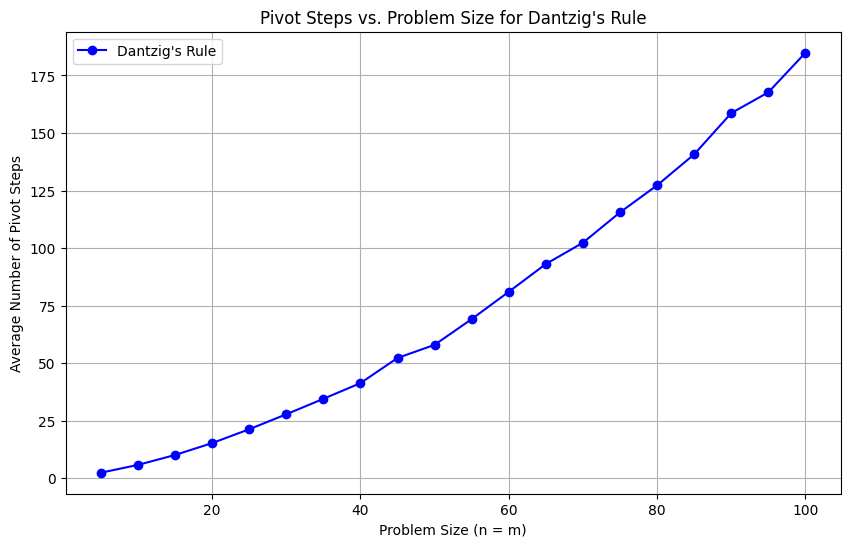

In [ ]:
import matplotlib.pyplot as plt

# Store results for plotting
sizes = []
avg_pivot_steps = []

# Loop through each problem size folder (5x5, 10x10, ..., 100x100)
for size in range(5, 101, 5):
    folder_name = f"{size}x{size}"
    file_path = os.path.join(balanced_folder, folder_name, "dantzig_results.json")

    if not os.path.exists(file_path):
        print(f"Skipping {folder_name}, file not found.")
        continue

    # Load JSON results
    with open(file_path, "r") as f:
        results = json.load(f)

    # Extract pivot steps from all instances
    pivot_steps = [results[f"{i}.lp"]["num_pivot_steps"] for i in range(1, 251)]

    # Compute average pivot steps
    avg_pivot = sum(pivot_steps) / len(pivot_steps)
    
    # Store results for plotting
    sizes.append(size)
    avg_pivot_steps.append(avg_pivot)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, avg_pivot_steps, marker="o", linestyle="-", color="b", label="Dantzig's Rule")

plt.xlabel("Problem Size (n = m)")
plt.ylabel("Average Number of Pivot Steps")
plt.title("Pivot Steps vs. Problem Size for Dantzig's Rule")
plt.legend()
plt.grid(True)
plt.savefig('pivot_steps.pdf')
plt.show()

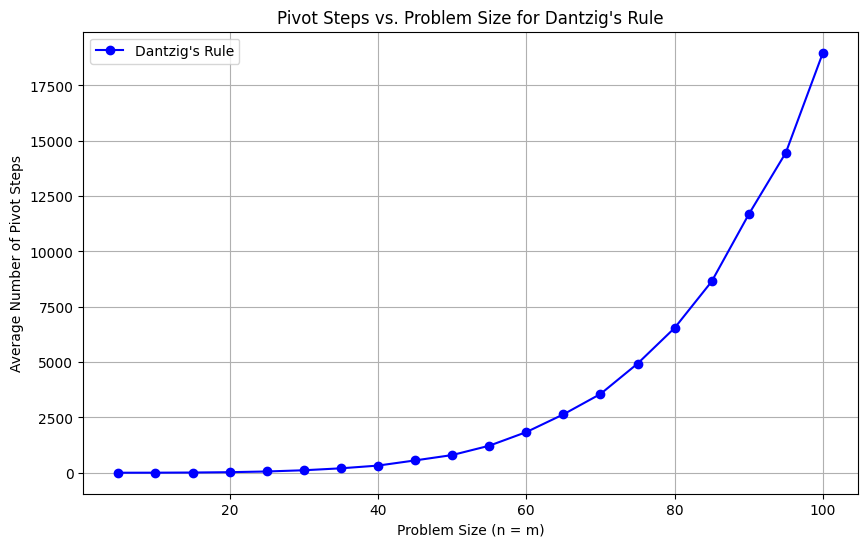

In [ ]:
import matplotlib.pyplot as plt

# Store results for plotting
sizes = []
avg_time = []

# Loop through each problem size folder (5x5, 10x10, ..., 100x100)
for size in range(5, 101, 5):
    folder_name = f"{size}x{size}"
    file_path = os.path.join(balanced_folder, folder_name, "dantzig_results.json")

    if not os.path.exists(file_path):
        print(f"Skipping {folder_name}, file not found.")
        continue

    # Load JSON results
    with open(file_path, "r") as f:
        results = json.load(f)

    # Extract pivot steps from all instances
    pivot_steps = [results[f"{i}.lp"]["first_phase_time"] for i in range(1, 251)]

    # Compute average pivot steps
    avg_pivot = sum(pivot_steps) / len(pivot_steps)
    
    # Store results for plotting
    sizes.append(size)
    avg_time.append(avg_pivot)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, avg_time, marker="o", linestyle="-", color="b", label="Dantzig's Rule")

plt.xlabel("Problem Size (n = m)")
plt.ylabel("Average Number of Pivot Steps")
plt.title("Pivot Steps vs. Problem Size for Dantzig's Rule")
plt.legend()
plt.grid(True)
plt.savefig('running_time.pdf')
plt.show()

## Plots for average total running time and average number of pivot steps for all pivot rules

### Computing and saving the averages

In [3]:
import numpy as np

In [13]:
pivot_rules = ["dantzig", "random", "bland"]
metrics = ["total_time", "num_pivot_steps"]
categories = {
    "balanced_problems": balanced_sizes,
    "wide_problems": wide_sizes,
    "tall_problems": tall_sizes,
}
results = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Iterate through categories and sizes
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        
        if not os.path.exists(folder_path):
            print("incorrect folder")
            continue
        
        avg_results = {metric: {} for metric in metrics}
        
        for rule in pivot_rules:
            file_path = os.path.join(folder_path, f"{rule}_results.json")
            if not os.path.exists(file_path):
                print("incorrect file")
                continue
            
            with open(file_path, "r") as f:
                data = json.load(f)
            
            # Extract values
            total_time = [entry["total_time"] for entry in data.values()]
            num_pivot_steps = [entry["num_pivot_steps"] for entry in data.values()]
            
            # Compute and store averages
            avg_results["total_time"][rule] = np.mean(total_time) if total_time else 0
            avg_results["num_pivot_steps"][rule] = np.mean(num_pivot_steps) if num_pivot_steps else 0

        # Save averages to JSON file in the same folder
        with open(os.path.join(folder_path, "averages.json"), "w") as f:
            json.dump(avg_results, f, indent=4)

print("Averages computed and stored successfully!")

Averages computed and stored successfully!


### Plots for average total running time and average number of pivot steps.

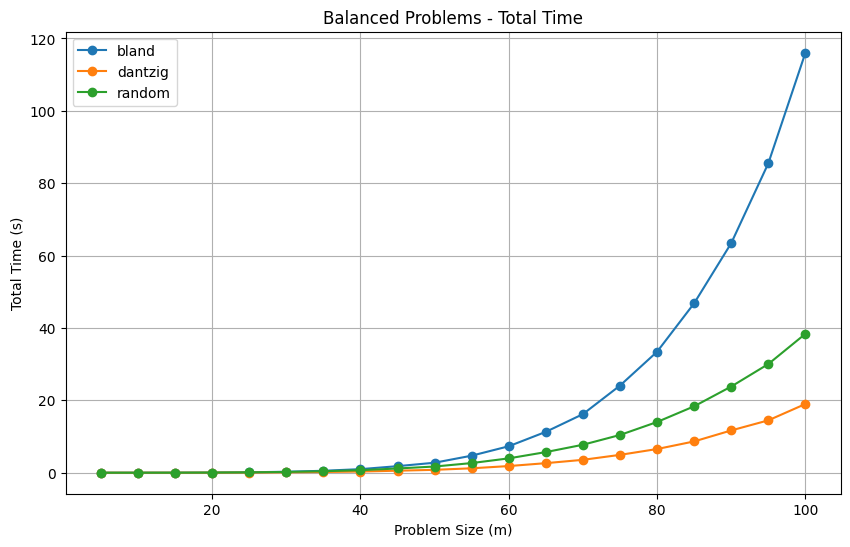

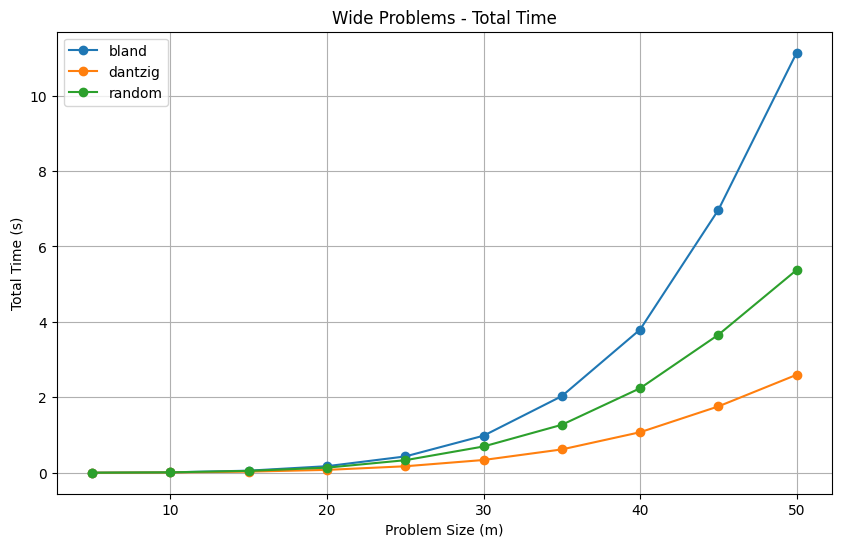

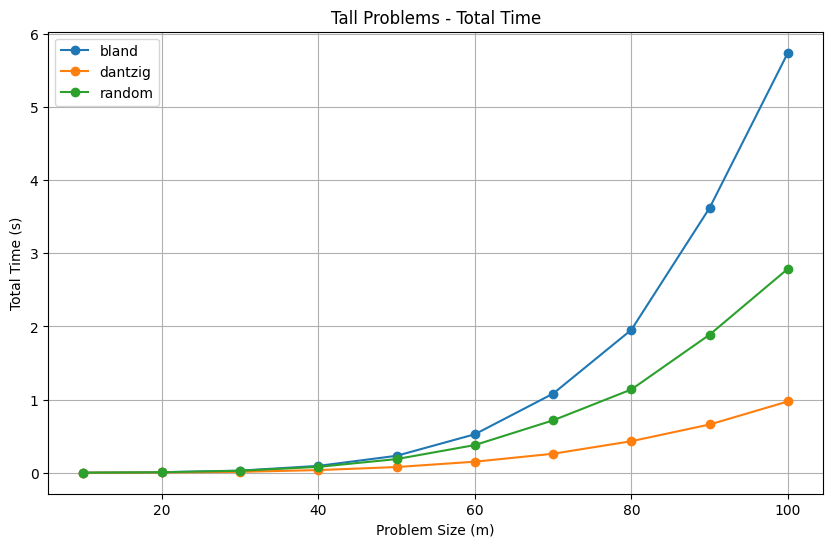

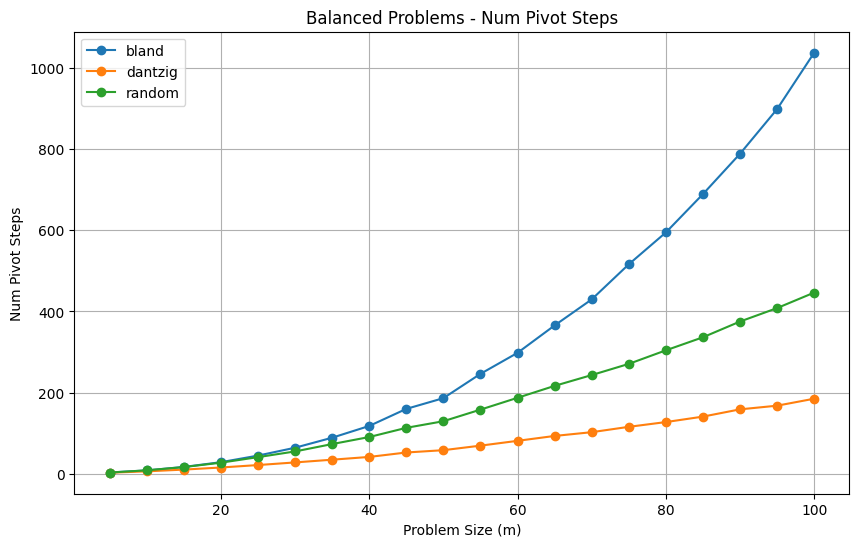

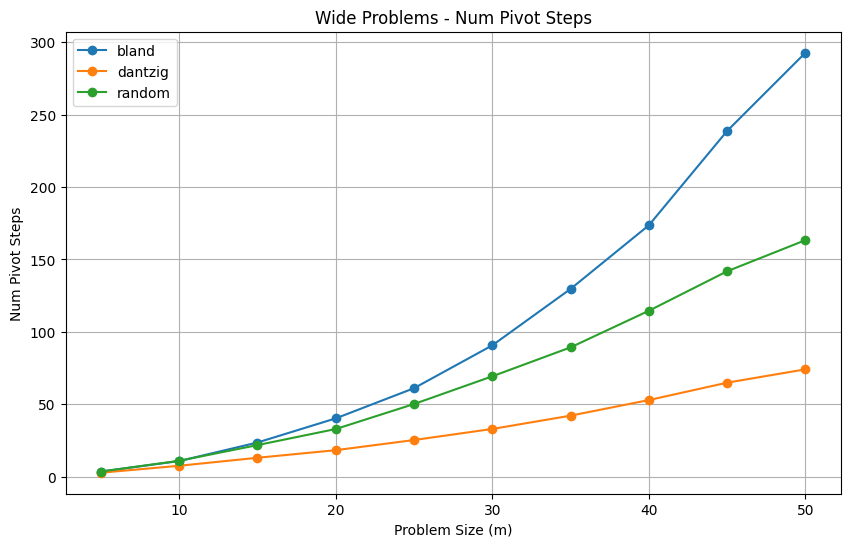

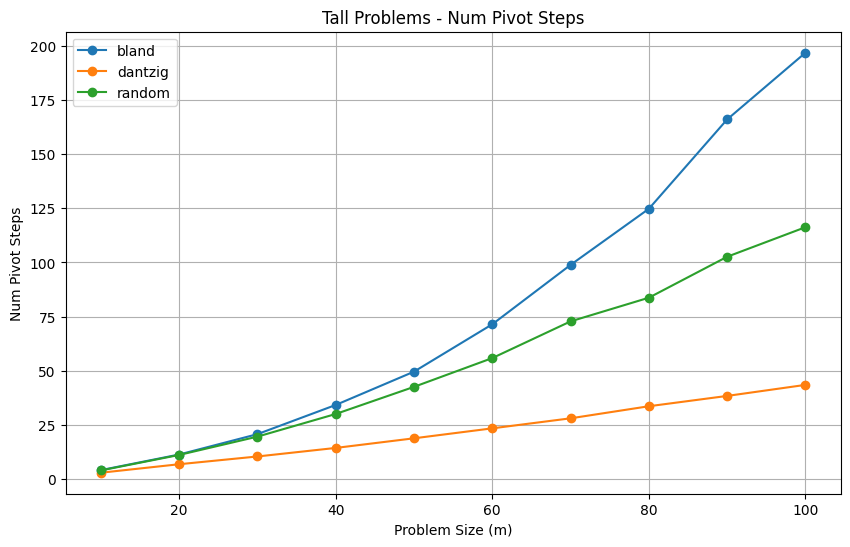

In [38]:

import matplotlib.pyplot as plt

# Storage for plotting
plot_data = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Read stored averages
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        avg_file = os.path.join(folder_path, "averages.json")

        if not os.path.exists(avg_file):
            print(avg_file)
            continue
        
        with open(avg_file, "r") as f:
            avg_results = json.load(f)

        for metric in metrics:
            for rule in pivot_rules:
                plot_data[category][metric][rule].append(avg_results.get(metric, {}).get(rule, 0))

for category in categories:
    for rule in pivot_rules:
        plot_data[category]["total_time"][rule] = [t / 1000 for t in plot_data[category]["total_time"][rule]]

# Generate plots
for metric in metrics:
    for category, sizes in categories.items():
        plt.figure(figsize=(10, 6))
        
        for rule in pivot_rules:
            plt.plot([s[0] for s in sizes], plot_data[category][metric][rule], label=rule, marker="o")
        
        plt.xlabel("Problem Size (m)")
        ylabel = metric.replace("_", " ").title()
        if metric == "total_time":
            ylabel += " (s)"
        plt.ylabel(ylabel)
        plt.title(f"{category.replace('_', ' ').title()} - {metric.replace('_', ' ').title()}")
        plt.legend()
        plt.grid(True)

        if not os.path.exists("./plots"):
            os.mkdir("plots")
        
        if not os.path.exists(os.path.join("plots", "pivot_rules")):
            os.mkdir(os.path.join("plots", "pivot_rules"))
        

        plt.savefig(os.path.join("plots", "pivot_rules", f"{category.split('_')[0]}_{metric}.pdf"), format="pdf")

        plt.show()

## Final step: statistical tests.